In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import cv2, os
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVCats():
    img_size = 50
    cats = "PetImages/Cat"
    dogs = "PetImages/Dog"
    labels = {cats: 0, dogs: 1}

    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.labels:
            print(label)
            for image in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, image)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.img_size, self.img_size))
                    self.training_data.append([np.array(img), 
                                              np.eye(2)[self.labels[label]]])
                    
                    if label == self.cats:
                      self.catcount += 1
                    elif label == self.dogs:
                      self.dogcount += 1
                
                except Exception as e:
                    pass
        
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVCats()
    dogsvcats.make_training_data()


  0%|          | 44/12501 [00:00<00:28, 433.27it/s]

PetImages/Cat


  1%|          | 63/12501 [00:00<00:19, 624.92it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:17<00:00, 725.04it/s]


Cats:  12476
Dogs:  12470


In [38]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [39]:
print(len(training_data))

24946


[array([[ 29,  20,  20, ...,  38,  39,  32],
       [ 28,  18,  20, ...,  36,  32,  33],
       [ 20,  20,  20, ...,  28,  30,  23],
       ...,
       [ 63,  60,  64, ..., 123, 119, 120],
       [ 54,  55,  69, ..., 114, 120, 120],
       [ 48,  54,  66, ..., 111, 116, 108]], dtype=uint8)
 array([0., 1.])]


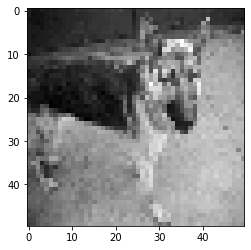

In [47]:
print(training_data[1])
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(training_data[1][0], cmap = 'gray')
